# 🧑‍🤝‍🧑 Customer Segmentation (Clustering)

**Author:** Rawal Vipul  
**ML Type:** Unsupervised Learning (Clustering)  

This notebook focuses on grouping customers based on behavior using KMeans clustering. Customized and executed as part of my AI/ML internship assignments.

---


# Dataset: Customer segmentation 
### Cluster customers based on purchase behavior → Unsupervised clustering 

In [1]:
# Analysis customized and executed by Rawal Vipul
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Analysis customized and executed by Rawal Vipul

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [17]:
# Analysis customized and executed by Rawal Vipul
df = pd.read_csv("customers.csv")

print("Shape:", df.shape)
print(df.head())
print("\nDtypes:\n", df.dtypes)

Shape: (793, 5)
         id             name    segment           state             city
0  CG-12520      Claire Gute   Consumer        Kentucky        Henderson
1  DV-13045  Darrin Van Huff  Corporate      California      Los Angeles
2  SO-20335   Sean O'Donnell   Consumer         Florida  Fort Lauderdale
3  BH-11710  Brosina Hoffman   Consumer      California      Los Angeles
4  AA-10480     Andrew Allen   Consumer  North Carolina          Concord

Dtypes:
 id         object
name       object
segment    object
state      object
city       object
dtype: object


In [18]:
# Analysis customized and executed by Rawal Vipul
id_like_cols = [col for col in df.columns if "id" in col.lower() or "name" in col.lower() or "email" in col.lower()]
df_clean = df.drop(columns=id_like_cols, errors="ignore")

print("\nDropped:", id_like_cols)


Dropped: ['id', 'name']


In [19]:
# Analysis customized and executed by Rawal Vipul
num_cols = df_clean.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df_clean.select_dtypes(include=["object"]).columns.tolist()

print("\nNumeric columns:", num_cols)
print("Categorical columns:", cat_cols)


Numeric columns: []
Categorical columns: ['segment', 'state', 'city']


In [20]:
# Analysis customized and executed by Rawal Vipul
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)


In [21]:
# Analysis customized and executed by Rawal Vipul
X_processed = preprocessor.fit_transform(df_clean)

print("\nProcessed data shape:", X_processed.shape)


Processed data shape: (793, 296)


In [22]:
# Analysis customized and executed by Rawal Vipul
K_range = range(2, 11)
inertia = []
sil_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_processed)

    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_processed, labels))

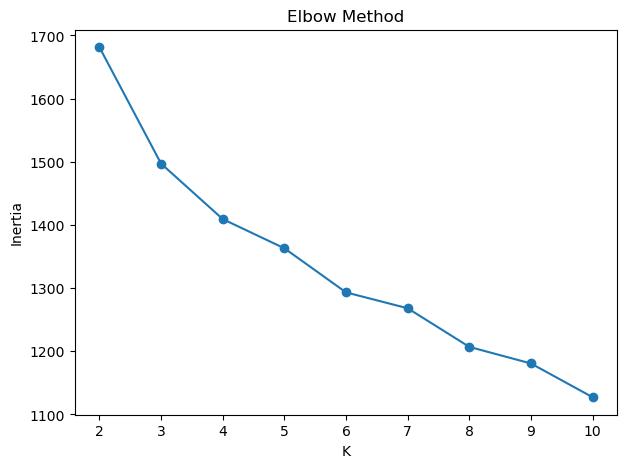

In [23]:
# Analysis customized and executed by Rawal Vipul
plt.figure(figsize=(7,5))
plt.plot(list(K_range), inertia, marker="o")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

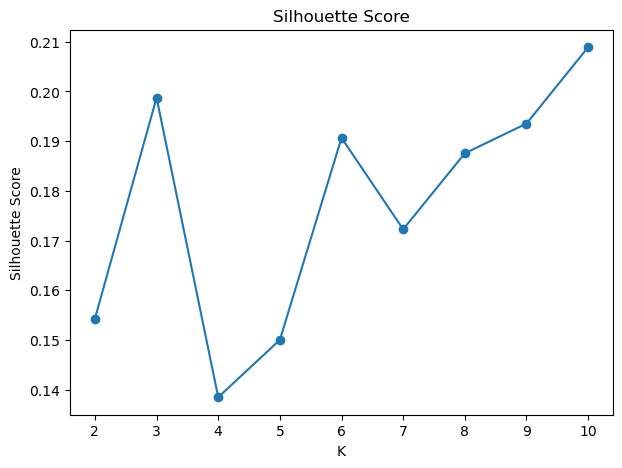

In [24]:
# Analysis customized and executed by Rawal Vipul
plt.figure(figsize=(7,5))
plt.plot(list(K_range), sil_scores, marker="o")
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

In [25]:
# Analysis customized and executed by Rawal Vipul
best_k = list(K_range)[np.argmax(sil_scores)]
print("\nBest K:", best_k)


Best K: 10


In [26]:
# Analysis customized and executed by Rawal Vipul
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_processed)

df["Cluster"] = clusters
print("\nCluster counts:\n", df["Cluster"].value_counts())


Cluster counts:
 Cluster
0    189
1    141
4    119
3     87
5     60
2     56
6     47
8     46
9     24
7     24
Name: count, dtype: int64


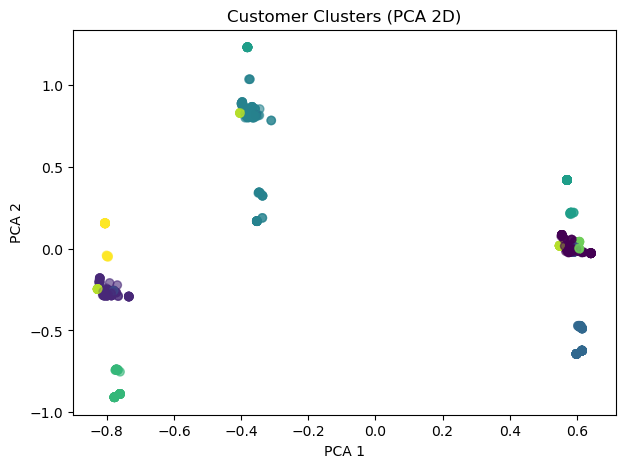

In [27]:
# Analysis customized and executed by Rawal Vipul
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, alpha=0.6)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Customer Clusters (PCA 2D)")
plt.show()